# Text Analysis(Topic Modeling):

Data loaded and cleaned.
Top Keywords:
       keyword          score
15      stocks  120048.420657
7       market   83037.704493
14      shares   77559.971297
4     earnings   75181.331827
18          vs   65464.128259
12     reports   64127.172118
17      update   63627.866238
1     benzinga   62142.509181
5          eps   61187.454960
0    announces   55964.729030
19        week   55357.341471
6          est   53595.025097
10          pt   50750.846783
3   downgrades   49541.715976
9        price   48214.325506
2          buy   47506.387748
13       sales   46230.892980
16     trading   43668.171643
8          mid   42797.117879
11      raises   39975.413665


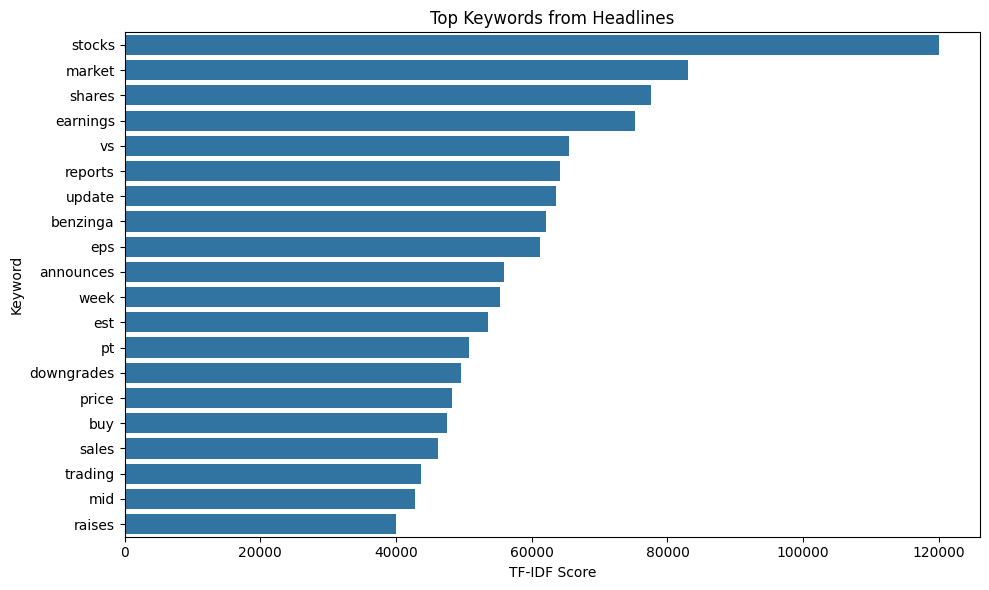

In [1]:
import sys
import os
# Path to your src folder
src_path = os.path.abspath("../src")  
sys.path.append(src_path)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer


# File path
file_path = r"C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy AIM 8\week 1\Nova-Financial-Solutions-Week1\data\raw_analyst_ratings.csv"
# Load the dataset
df = pd.read_csv(file_path)
df.dropna(subset=['headline', 'date'], inplace=True)
print("Data loaded and cleaned.")


# Topic Modeling and Keyword Extraction
# This notebook identifies common keywords and phrases from financial news headlines using NLP techniques.

# Clean Data 
df.dropna(subset=['headline'], inplace=True)

# Preprocess Headlines 
headlines = df['headline'].str.lower()

# TF-IDF Keyword Extraction 
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(headlines)

# Get top keywords
keywords = vectorizer.get_feature_names_out()
scores = X.sum(axis=0).A1
keyword_df = pd.DataFrame({'keyword': keywords, 'score': scores}).sort_values(by='score', ascending=False)

print("Top Keywords:")
print(keyword_df)

# Visualize Top Keywords 
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='keyword', data=keyword_df)
plt.title('Top Keywords from Headlines')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('stopwords', quiet=True)

# Load data ---
df = pd.read_csv(r"C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy AIM 8\week 1\Nova-Financial-Solutions-Week1\data\raw_analyst_ratings.csv")  # change path if needed
headlines = df["headline"].dropna().astype(str).tolist()

print(f"Loaded {len(headlines):,} headlines")

# Clean and tokenize ---
stop_words = set(stopwords.words("english"))

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)        # keep only letters
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 3]
    return tokens

tokenized_docs = [clean_and_tokenize(h) for h in headlines]

# Create dictionary and corpus ---
dictionary = corpora.Dictionary(tokenized_docs)
dictionary.filter_extremes(no_below=20, no_above=0.5)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

print(f"Vocabulary size: {len(dictionary):,}")
print(f"Corpus size: {len(corpus):,}")

# Train LDA model ---
print("Training LDA model (10 topics)...")
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    passes=10,
    iterations=100,
    random_state=42,
    eval_every=None
)

# Show top words per topic ---
print("\n" + "="*60)
print("TOP 10 TOPICS DISCOVERED")
print("="*60)
for i in range(10):
    words = lda_model.show_topic(i, topn=8)
    word_str = " | ".join([w for w, p in words])
    print(f"Topic {i+1:2d}: {word_str}")

# --- Step 6: Interactive visualization ---
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

Loaded 1,407,328 headlines
Vocabulary size: 16,883
Corpus size: 1,407,328
Training LDA model (10 topics)...

TOP 10 TOPICS DISCOVERED
Topic  1: benzingas | group | biggest | downgrades | movers | upgrades | yesterday | march
Topic  2: shares | market | retail | update | financials | staples | industrials | energy
Topic  3: initiates | announces | coverage | zumiez | capital | wells | credit | fargo
Topic  4: stocks | sector | week | benzinga | utilities | watch | estimate | sales
Topic  5: price | raises | target | maintains | lowers | downgrades | morgan | bank
Topic  6: earnings | scheduled | ahead | data | high | april | february | xerox
Topic  7: shares | company | benzingas | guidance | trading | higher | losers | gainers
Topic  8: reports | sales | stocks | session | moving | sees | alert | option
Topic  9: check | update | stock | yahoo | markets | western | holdings | brands
Topic 10: etfs | says | share | yelp | energy | health | zoetis | announces


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.016798 -0.215766       1        1  16.329702
9      0.065439 -0.167683       2        1  12.194116
8      0.108460 -0.224413       3        1  10.060323
4      0.252809  0.103017       4        1   9.878894
7     -0.233650 -0.012840       5        1   9.823763
2      0.246049  0.017113       6        1   9.013726
3     -0.247150  0.057759       7        1   8.931937
6     -0.172119 -0.008787       8        1   8.462103
5     -0.054228  0.113080       9        1   7.889637
0      0.051189  0.338521      10        1   7.415799, topic_info=            Term           Freq          Total Category  logprob  loglift
42      earnings   98213.000000   98213.000000  Default  30.0000  30.0000
92       reports  104733.000000  104733.000000  Default  29.0000  29.0000
2         stocks  136945.000000  136945.000000  Default  28.0000  28.0000
14         price  101873.000000  101873.000000  Default  27.0000  27.0000
472         etfs   98202.000000   98202.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
226    benzingas   42741.900402   65496.489781  Topic10  -2.7849   2.1747
1156       money   11277.149466   14301.211182  Topic10  -4.1173   2.3640
229     upgrades   26959.064184   56882.763210  Topic10  -3.2458   1.8549
227   downgrades   27381.624528   62394.205140  Topic10  -3.2302   1.7780
371         june    3944.664814   13326.474967  Topic10  -5.1677   1.3842

[433 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
368        2  0.737717      acquire
368        3  0.262191      acquire
575        6  0.999798     acquires
712        1  0.258806  acquisition
712        2  0.741047  acquisition
...      ...       ...          ...
7843       6  0.999881        zions
13495      9  0.999880     ziopharm
4884       2  0.999910       zoetis
7585       6  0.999906       zumiez
5509       1  0.999975        zynga

[471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 9, 5, 8, 3, 4, 7, 6, 1])

C:\Users\gasha\AppData\Local\Temp\ipykernel_47920\2961593174.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="5y", progress=False)


AAPL - 5 Year Performance


<Axes: title={'center': 'AAPL + SMA/EMA (via yfinance)'}, xlabel='Date'>

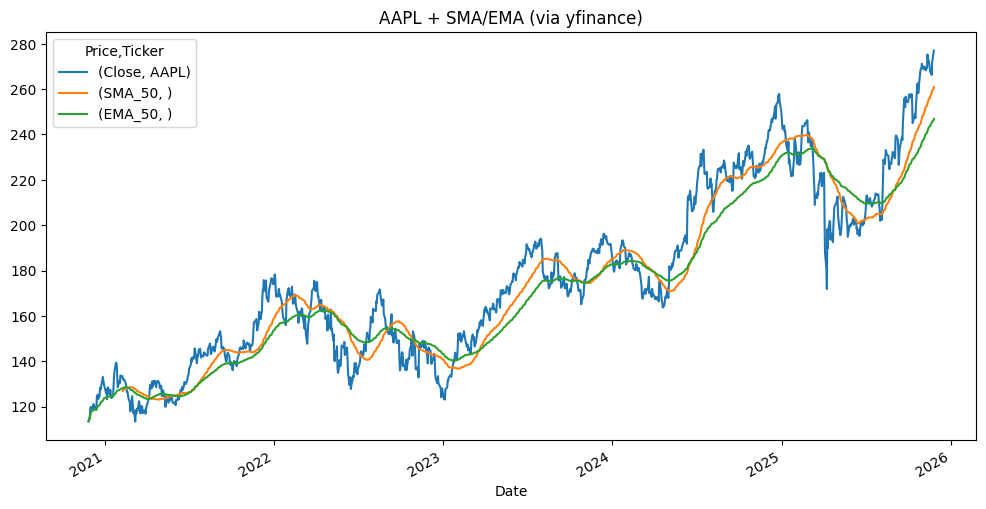

In [ ]:
import yfinance as yf
import pandas as pd

# Download 5 years of AAPL data (one line)
df = yf.download("AAPL", period="5y", progress=False)

# Add indicators (simple & clean)
df["SMA_50"] = df["Close"].rolling(50).mean()
df["EMA_50"] = df["Close"].ewm(50).mean()

# Performance (simple functions)
returns = df["Close"].pct_change().dropna()
annual_return = (1 + returns.mean()) ** 252 - 1
volatility = returns.std() * (252 ** 0.5)
sharpe = annual_return / volatility

# Print results
print("AAPL - 5 Year Performance")

# Simple plot
df[["Close", "SMA_50", "EMA_50"]].plot(figsize=(12,6), title="AAPL + SMA/EMA (via yfinance)")